## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# __Importing Pandas/Numpy/Zipfile__

In [151]:
# importing pandas, numpy and zipfile
import zipfile
import pandas as pd
import datetime
import numpy as np
from dateutil.relativedelta import relativedelta
import json
import numpy as np
import matplotlib.pyplot as plt

# _Cleaning TV movies budget_

In [262]:
## opening read file
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='gzip')

In [263]:
### removing $ and , from Production Budget and and changing type to integer

budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['production_budget'] = budget['production_budget'].astype(int)

### removing $ and , from Domestic Gross and and changing type to integer

budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].astype(int)

### removing $ and , from Worldwide Gross and changing type to integer

budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$', '')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',', '')
budget['worldwide_gross'] = budget['worldwide_gross'].astype(int)

In [264]:
##creating new column release year

budget['release_year'] = pd.DatetimeIndex(budget['release_date']).year

In [ ]:
# adding Avengers end game

top_gross_movies.loc[len(top_gross_movies.index)] = [0, "2019-04-26", "Avengers: End Game",
                                 356000000, 858373000, 2794731755, 2019] 

In [265]:
### changing type of release Date to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [266]:
## converting 'release_date' column type from integer to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [252]:
##renaming movie column to title
budget = budget.rename(columns = {"movie":"title"})

# _Analyzing TV movies Budget_

In [267]:
#Checking TV Movies budget data
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_year       5782 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 316.3+ KB


In [268]:
#finding datset age range and ranges 105 years

oldest_movie = min(budget['release_date'])
newest_movie = max(budget['release_date'])
movie_range = relativedelta(newest_movie, oldest_movie).years

print(oldest_movie)
print(newest_movie)
print(movie_range)

1915-02-08 00:00:00
2020-12-31 00:00:00
105


In [279]:
##defining and sorting top 20 grossing movies

top_gross_movies = budget.sort_values(by="worldwide_gross",ascending=False).head(20)
top_gross_movies


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,2015
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,2012
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2018
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011


In [34]:
max_values = {}
 
# Groupby release date
max_values = budget.groupby(budget['release_date'].dt.year).max()

max_values

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year
release_date,,,,,,,
1915,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,1915
1916,24,1916-12-24,Intolerance,385907,8000000,8000000,1916
1920,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
1925,70,1925-12-30,The Big Parade,3900000,11000000,22000000,1925
1927,85,1927-08-12,Wings,2000000,0,0,1927
...,...,...,...,...,...,...,...
2016,100,2016-12-31,Zootopia,250000000,532177324,1140069413,2016
2017,100,2017-12-31,xXx: Return of Xander Cage,317000000,620181382,1316721747,2017
2018,100,2018-12-31,Winchester,300000000,700059566,2048134200,2018


In [32]:
top_10 = max_values.loc[max_values['release_date'].dt.year > 2009]
top_10

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year
release_date,,,,,,,
2010,99,2010-12-31,[Rec] 2,260000000,415004880,1068879522,2010
2011,100,2011-12-31,Zookeeper,410600000,381193157,1341693157,2011
2012,100,2012-12-31,Zero Dark Thirty,275000000,623279547,1517935897,2012
2013,100,2013-12-31,Zulu,275000000,424668047,1272469910,2013
2014,100,2014-12-31,X-Men: Days of Future Past,250000000,350126372,1104039076,2014
2015,100,2015-12-31,Zipper,330600000,936662225,2053311220,2015
2016,100,2016-12-31,Zootopia,250000000,532177324,1140069413,2016
2017,100,2017-12-31,xXx: Return of Xander Cage,317000000,620181382,1316721747,2017
2018,100,2018-12-31,Winchester,300000000,700059566,2048134200,2018


In [ ]:
past_10_years = pd.DataFrame(columns=max_values.columns)

# Loop through max_values
for index, row in max_values.iterrows():
    if row['release_year'] > 2010:
        past_10_years = past_10_years.append(row, ignore_index=True)

past_10_years

# Data Source #2 - TMBD - Pulled from API

In [36]:
import requests
import pandas as pd


# creating loop to pull 1000 records from top rated movies
# set page numbers
page = 1
total_pages = 400

# empty list
data_list = []

# loop to iterate
while page <= total_pages:
    # make a request to the API with the current page number
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=' + str(page))

    # response
    data = response.json()['results']
    # append data to list
    data_list.append(data)

    # increase page number
    page += 1

In [40]:
response.json().keys()

dict_keys(['page', 'results', 'total_pages', 'total_results'])

In [38]:
# concatenate the data into a pandas DataFrame
top_movies = pd.concat([pd.DataFrame(data) for data in data_list], ignore_index=True)

In [39]:
#reindexing dataframe
top_movies = top_movies .reset_index(drop=True)

In [41]:
# split the list into columns
split_movies = top_movies ['genre_ids'].apply(pd.Series)

#renaming the columns
split_movies = split_movies.rename(columns=lambda x: f'col_{x+1}')

# add the new columns back to top_rated DataFrame
top_movies = pd.concat([top_movies, split_movies], axis=1)

In [42]:
##dropping null values
top_movies.dropna(axis=0, how='any', subset=['title'], inplace=True)

In [43]:
#dropping columns that aren't needed

top_movies = top_movies.drop(['adult', 'backdrop_path', 'genre_ids', 'poster_path', 'video',
                          'original_language', 'overview','col_7', 'col_8', 'col_9',], axis=1)

In [44]:
#renaming the genre columns
top_movies.rename(columns = {'col_1':'genre_id_1','col_2':'genre_id_2','col_3':'genre_id_3',
                            'col_4':'genre_id_4', 'col_5':'genre_id_5', 'col_6':'genre_id_6'}, inplace = True)

In [45]:
##changing N/A variables to 0
top_movies = top_movies.fillna(0)

In [46]:
## converting  column type from float64 to int

top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']] = top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']].astype(int)

In [47]:
top_movies['title'] = top_movies['title'].astype('str')

In [48]:
## converting 'release_date' column type from integer to datetime

top_movies['release_date'] = pd.to_datetime(top_movies['release_date'])

In [49]:
##information about first and last movie entry in data

first_movie = min(top_movies['release_date'])
last_movie = max(top_movies['release_date'])

print(first_movie)
print(last_movie)

1895-06-10 00:00:00
2023-03-01 00:00:00


In [50]:
top_movies


,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
0,238,The Godfather,101.679,1972-03-14,The Godfather,8.7,17564,18,80,0,0,0,0
1,278,The Shawshank Redemption,84.925,1994-09-23,The Shawshank Redemption,8.7,23400,18,80,0,0,0,0
2,772071,Cuando Sea Joven,47.213,2022-09-14,Cuando Sea Joven,8.7,209,35,14,0,0,0,0
3,995133,"The Boy, the Mole, the Fox and the Horse",28.940,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,249,16,10751,12,14,0,0
4,240,The Godfather Part II,59.963,1974-12-20,The Godfather Part II,8.6,10635,18,80,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11858,Renaissance Man,9.429,1994-06-03,Renaissance Man,6.1,252,35,18,0,0,0,0
7996,410199,ARQ,12.169,2016-09-16,ARQ,6.1,1035,878,53,0,0,0,0
7997,294793,All the Old Knives,41.599,2022-04-08,All the Old Knives,6.1,409,53,28,0,0,0,0
7998,77951,Walking with Dinosaurs,25.011,2013-12-18,Walking with Dinosaurs,6.1,415,16,10751,12,0,0,0


[238,
 278,
 772071,
 995133,
 240,
 424,
 19404,
 129,
 389,
 372058,
 496243,
 155,
 497,
 680,
 429,
 13,
 122,
 696374,
 372754,
 769,
 11216,
 346,
 637,
 704264,
 724089,
 311,
 12477,
 539,
 550,
 510,
 761053,
 667257,
 620249,
 598,
 324857,
 315162,
 4935,
 14537,
 120,
 378064,
 92321,
 1891,
 157336,
 851644,
 423,
 652837,
 244786,
 121,
 40096,
 599,
 18491,
 807,
 27205,
 553512,
 567,
 73,
 3782,
 914,
 255709,
 274,
 901,
 128,
 795607,
 12493,
 101,
 207,
 644479,
 3082,
 20334,
 105,
 441130,
 533514,
 283566,
 361743,
 568300,
 527641,
 630566,
 335,
 568332,
 25237,
 28,
 29259,
 975,
 632632,
 16672,
 555604,
 635302,
 447362,
 10494,
 637920,
 77338,
 10376,
 618344,
 265177,
 299534,
 670,
 797,
 508965,
 299536,
 575813,
 1585,
 8587,
 290098,
 537061,
 15804,
 42269,
 490132,
 18148,
 31414,
 572154,
 110420,
 5156,
 556574,
 522924,
 755812,
 24188,
 354912,
 284,
 694,
 37257,
 518068,
 185,
 762975,
 810693,
 791373,
 490,
 504253,
 610892,
 10098,
 16869,


In [51]:
most_popular = top_movies.sort_values(by='popularity',ascending=False).head(20)
most_popular

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
6190,631842,Knock at the Cabin,3422.537,2023-02-01,Knock at the Cabin,6.5,884,27,9648,53,0,0,0
2020,505642,Black Panther: Wakanda Forever,2525.408,2022-11-09,Black Panther: Wakanda Forever,7.3,3922,28,12,878,0,0,0
35,315162,Puss in Boots: The Last Wish,2158.063,2022-12-07,Puss in Boots: The Last Wish,8.4,4358,16,12,35,10751,0,0
570,937278,A Man Called Otto,1977.383,2022-12-28,A Man Called Otto,7.8,540,35,18,0,0,0,0
4221,646389,Plane,1752.139,2023-01-12,Plane,6.8,815,28,12,53,0,0,0
3773,677179,Creed III,1627.738,2023-03-01,Creed III,6.9,207,18,28,0,0,0,0
793,76600,Avatar: The Way of Water,1136.205,2022-12-14,Avatar: The Way of Water,7.7,5649,878,12,28,0,0,0
1523,536554,M3GAN,1064.609,2022-12-28,M3GAN,7.5,1937,878,27,35,0,0,0
6853,758009,Shotgun Wedding,1043.225,2022-12-28,Shotgun Wedding,6.3,618,28,10749,35,0,0,0
6531,640146,Ant-Man and the Wasp: Quantumania,925.734,2023-02-15,Ant-Man and the Wasp: Quantumania,6.4,924,12,878,35,0,0,0


# ANALYZING/VISUALIZING GENRE DATA

In [52]:
#genre 1

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([28]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([12]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_df = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_df.drop([i for i in merged_genre_df.columns if 'remove' in i],
               axis=1, inplace=True)

merged_genre_df

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
16,122,The Lord of the Rings: The Return of the King,82.485,2003-12-01,The Lord of the Rings: The Return of the King,8.5,21239,12,14,28,0,0,0
23,704264,Primal: Tales of Savagery,16.276,2019-11-21,Primal: Tales of Savagery,8.5,258,28,12,16,18,0,0
34,324857,Spider-Man: Into the Spider-Verse,94.379,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,12447,28,12,16,878,0,0
38,120,The Lord of the Rings: The Fellowship of the Ring,99.268,2001-12-18,The Lord of the Rings: The Fellowship of the Ring,8.4,22348,12,14,28,0,0,0
41,1891,The Empire Strikes Back,33.237,1980-05-20,The Empire Strikes Back,8.4,15106,12,28,878,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7916,1656,The Legend of Zorro,24.822,2005-10-24,The Legend of Zorro,6.1,2560,28,12,37,0,0,0
7919,335778,Risen,24.142,2016-02-18,Risen,6.1,720,28,36,12,18,0,0
7938,9103,The Quest,16.334,1996-04-19,The Quest,6.1,582,28,12,0,0,0,0
7947,262504,Allegiant,32.330,2016-03-09,Allegiant,6.1,6055,12,878,28,9648,0,0


In [53]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8000 non-null   int64         
 1   original_title  8000 non-null   object        
 2   popularity      8000 non-null   float64       
 3   release_date    8000 non-null   datetime64[ns]
 4   title           8000 non-null   object        
 5   vote_average    8000 non-null   float64       
 6   vote_count      8000 non-null   int64         
 7   genre_id_1      8000 non-null   int64         
 8   genre_id_2      8000 non-null   int64         
 9   genre_id_3      8000 non-null   int64         
 10  genre_id_4      8000 non-null   int64         
 11  genre_id_5      8000 non-null   int64         
 12  genre_id_6      8000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(2)
memory usage: 875.0+ KB


In [54]:
top_sub_genres_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 3 to 7998
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1245 non-null   int64         
 1   original_title  1245 non-null   object        
 2   popularity      1245 non-null   float64       
 3   release_date    1245 non-null   datetime64[ns]
 4   title           1245 non-null   object        
 5   vote_average    1245 non-null   float64       
 6   vote_count      1245 non-null   int64         
 7   genre_id_1      1245 non-null   int64         
 8   genre_id_2      1245 non-null   int64         
 9   genre_id_3      1245 non-null   int64         
 10  genre_id_4      1245 non-null   int64         
 11  genre_id_5      1245 non-null   int64         
 12  genre_id_6      1245 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(2)
memory usage: 136.2+ KB


In [55]:
##creating new dataframe with only the top genres

top_genres = top_movies[['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']].apply(pd.Series.value_counts)
top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
0,2,1273,3775,6593,7642,7927.0
12,451,425,250,90,24,5.0
14,172,270,230,155,59,6.0
16,506,241,104,15,4,2.0
18,2144,1411,484,113,15,2.0
27,457,212,109,32,6,3.0
28,935,476,192,63,18,7.0
35,1525,754,345,112,26,2.0
36,44,238,148,44,5,NaN
37,65,28,20,14,3,2.0


In [56]:
##changing N/A variables to 0
top_genres = top_genres.fillna(0)
top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
0,2,1273,3775,6593,7642,7927.0
12,451,425,250,90,24,5.0
14,172,270,230,155,59,6.0
16,506,241,104,15,4,2.0
18,2144,1411,484,113,15,2.0
27,457,212,109,32,6,3.0
28,935,476,192,63,18,7.0
35,1525,754,345,112,26,2.0
36,44,238,148,44,5,0.0
37,65,28,20,14,3,2.0


In [57]:
##creating a genre total column that sums up the total values and making it a integer
top_genres['genre_total'] = top_genres.sum(axis=1)

In [58]:
#dropping first row
top_genres.drop([0],inplace=True)
top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_total
12,451,425,250,90,24,5.0,1245.0
14,172,270,230,155,59,6.0,892.0
16,506,241,104,15,4,2.0,872.0
18,2144,1411,484,113,15,2.0,4169.0
27,457,212,109,32,6,3.0,819.0
28,935,476,192,63,18,7.0,1691.0
35,1525,754,345,112,26,2.0,2764.0
36,44,238,148,44,5,0.0,479.0
37,65,28,20,14,3,2.0,132.0
53,345,659,625,216,40,3.0,1888.0


In [59]:
##dropping columns

top_genres_total= top_genres.drop(columns=['genre_id_1', 'genre_id_2','genre_id_3','genre_id_4',
                                          'genre_id_5','genre_id_6'])
top_genres_total

,genre_total
12,1245.0
14,892.0
16,872.0
18,4169.0
27,819.0
28,1691.0
35,2764.0
36,479.0
37,132.0
53,1888.0


In [60]:
##creating column with the genre names

top_genres_total['genre_name'] = ['Adventure','Fantasy','Animation','Drama','Horror','Action','Comedy','History','Western','Thriller','Crime','Science Fiction', 'Mystery', 'Music','Romance','Family', 'War', 'TV Movie']

In [61]:
top_genres_total

,genre_total,genre_name
12,1245.0,Adventure
14,892.0,Fantasy
16,872.0,Animation
18,4169.0,Drama
27,819.0,Horror
28,1691.0,Action
35,2764.0,Comedy
36,479.0,History
37,132.0,Western
53,1888.0,Thriller


In [62]:
##changing order of the columns

top_genres_total = top_genres_total [['genre_name', 'genre_total']]

In [63]:
top_genres_total = top_genres_total.sort_values(by='genre_total',ascending=False).head(20)

In [64]:
top_genres_total_spose = top_genres_total.transpose()
top_genres_total_spose['name'] = ['A','B']

first_column = top_genres_total_spose.pop('name')

top_genres_total_spose.insert(0, 'name', first_column)

top_genres_total_spose.rename(columns={"name":"Genre", 12:'Adventure', 14:'Fantasy', 16:'Animation', 18:'Drama', 27:'Horror', 28:'Action', 35:'Comedy', 36:'History', 37:'Western', 53:'Thriller', 80:'Crime', 878: 'Science Fiction', 9648:'Mystery', 10402:'Music', 10749:'Romance', 10751:'Family', 10752:'War', 10770:'TV Movie'}, inplace = True)

In [65]:
top_genres_total_spose = top_genres_total_spose.tail(-1)
top_genres_total_spose

,Genre,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Family,Fantasy,Animation,Horror,Science Fiction,Mystery,History,War,Music,Western,TV Movie
genre_total,B,4169,2764,1888,1691,1447,1245,1213,964,892,872,819,802,683,479,318,282,132,128


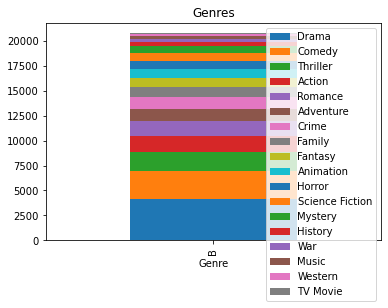

In [66]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# plot data in stack manner of bar type
top_genres_total_spose.plot(x='Genre', kind='bar', stacked=True, title='Genres')
plt.rcParams['figure.figsize'] = [10, 10]

plt.show()

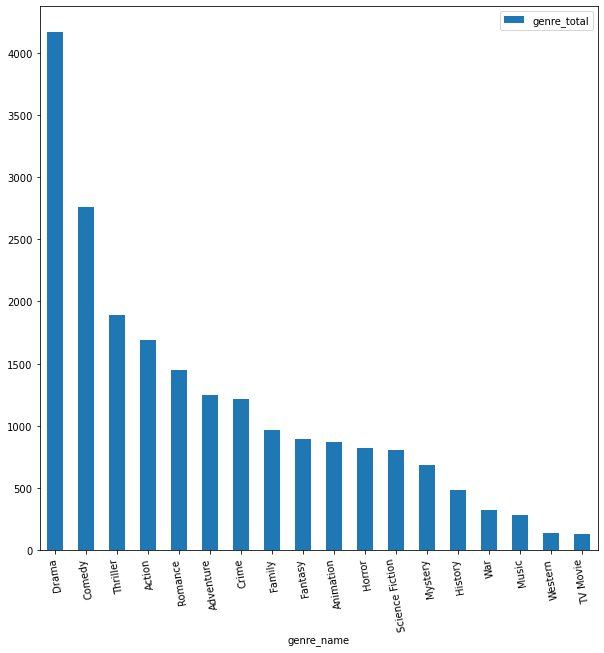

In [67]:
ax = top_genres_total.plot.bar(x='genre_name', y='genre_total', rot=100)

AttributeError: 'Rectangle' object has no property 'ms'

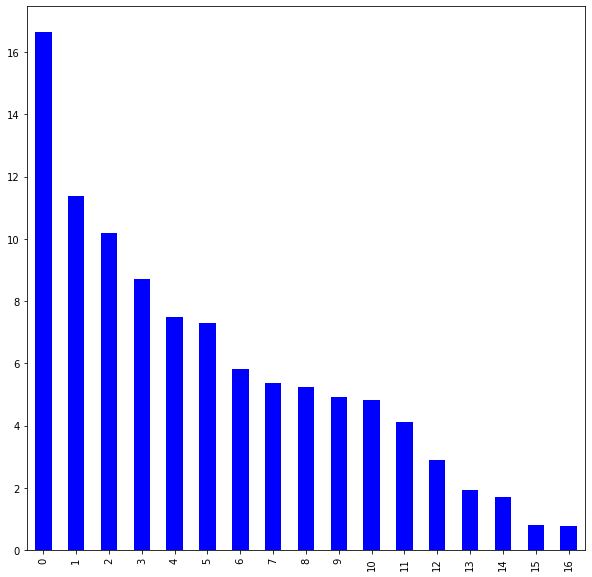

In [185]:
fig, ax = plt.subplots()

genre_breakdown['percent'].plot(kind='bar', color='blue')
genre_data['Share'].plot(kind='bar', color='black', ms=10)

plt.show()

# ANALYZING SUBGENRE

In [68]:
# ADVENTURE DRAMA

#genre 1 - ADVENTURE

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - DRAMA
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([12]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_12 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_12.drop([i for i in merged_genre_18_12.columns if 'remove' in i],
               axis=1, inplace=True)

In [69]:
# COMEDY DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - COMEDY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([35]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_35 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_35.drop([i for i in merged_genre_18_35.columns if 'remove' in i],
               axis=1, inplace=True)

In [70]:
# FANTASY DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - FANTASY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([14]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_14 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_14.drop([i for i in merged_genre_18_14.columns if 'remove' in i],
               axis=1, inplace=True)

In [71]:
# ROMANCE DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ROMANCE
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([10749]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_10749 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_10749.drop([i for i in merged_genre_18_10749.columns if 'remove' in i],
               axis=1, inplace=True)

In [72]:
# ACTION DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ACTION
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([28]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_28 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_28.drop([i for i in merged_genre_18_28.columns if 'remove' in i],
               axis=1, inplace=True)

In [73]:
# CRIME DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - CRIME
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([80]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_80 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_80.drop([i for i in merged_genre_18_80.columns if 'remove' in i],
               axis=1, inplace=True)

In [74]:
# creating new dataframe with lenths of sub-genres
genre_data = [len(merged_genre_18_12.index), len(merged_genre_18_35.index),
              len(merged_genre_18_14.index), len(merged_genre_18_10749.index), len(merged_genre_18_28.index),
              len(merged_genre_18_80.index)]

genre_data_graph = pd.DataFrame(genre_data, columns = ['genre_total'])

# naming the columns based on the genre keys
no_drama = ['Adventure Drama', 'Comedy Drama', 'Fantasy Drama', 'Romance Drama', 'Action Drama','Crime Drama']

genre_data_graph['genre_name'] = no_drama

# re-arranging column position
moving_genre = genre_data_graph.pop('genre_name')
  
genre_data_graph.insert(0, 'genre_name', moving_genre)

In [77]:
# sorting by genre total
sub_genre_sorted = genre_data_graph.sort_values(by='genre_total',ascending=False)
sub_genre_sorted

,genre_name,genre_total
3,Romance Drama,988
1,Comedy Drama,956
5,Crime Drama,687
4,Action Drama,501
0,Adventure Drama,291
2,Fantasy Drama,235


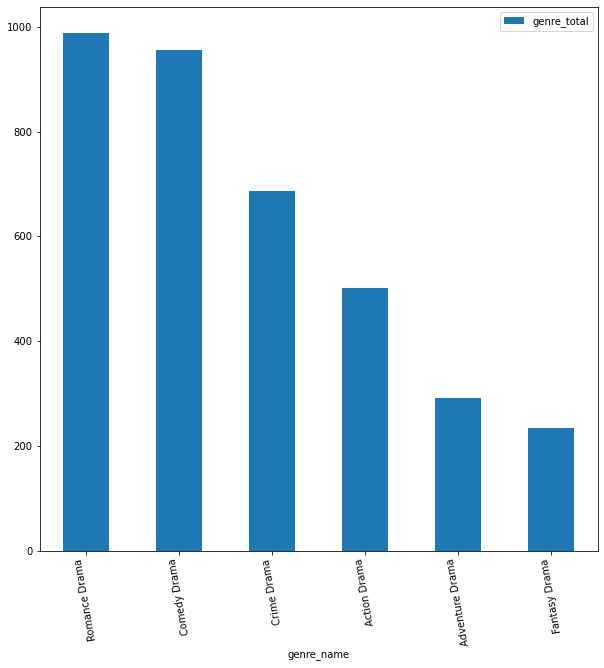

In [174]:
sub_genre_graph = sub_genre_sorted.plot.bar(x='genre_name', y='genre_total', rot=100)

# GENRES WITH DRAMA REMOVED

In [175]:
top_genres_no_drama = top_genres_total

In [176]:
top_genres_no_drama = top_genres_no_drama.tail(-1)
top_genres_no_drama 

,genre_name,genre_total
35,Comedy,2764.0
53,Thriller,1888.0
28,Action,1691.0
10749,Romance,1447.0
12,Adventure,1245.0
80,Crime,1213.0
10751,Family,964.0
14,Fantasy,892.0
16,Animation,872.0
27,Horror,819.0


In [177]:
top_genres_no_drama 

,genre_name,genre_total
35,Comedy,2764.0
53,Thriller,1888.0
28,Action,1691.0
10749,Romance,1447.0
12,Adventure,1245.0
80,Crime,1213.0
10751,Family,964.0
14,Fantasy,892.0
16,Animation,872.0
27,Horror,819.0


In [178]:
genre_breakdown = top_genres_no_drama

genre_breakdown['percent'] = ((genre_breakdown['genre_total'] / genre_breakdown['genre_total'].sum()) * 100)
genre_breakdown

<ipython-input-178-ef5f880a8ff3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_breakdown['percent'] = ((genre_breakdown['genre_total'] / genre_breakdown['genre_total'].sum()) * 100)


,genre_name,genre_total,percent
35,Comedy,2764.0,16.631566
53,Thriller,1888.0,11.360491
28,Action,1691.0,10.175101
10749,Romance,1447.0,8.706902
12,Adventure,1245.0,7.491425
80,Crime,1213.0,7.298875
10751,Family,964.0,5.800590
14,Fantasy,892.0,5.367351
16,Animation,872.0,5.247006
27,Horror,819.0,4.928094


In [179]:
genre_breakdown = genre_breakdown.reset_index()

In [ ]:
genre_breakdown_top_5 = 

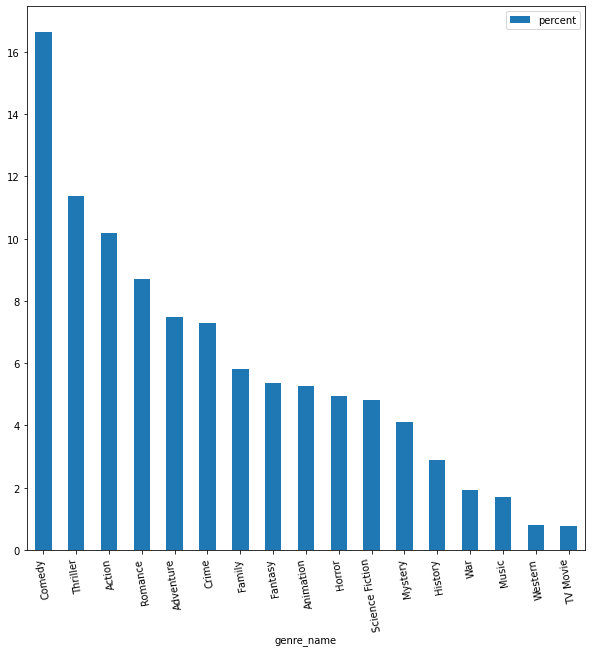

In [181]:
no_drama = genre_breakdown.plot.bar(x='genre_name', y='percent', rot=100)

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 
# plot data in stack manner of bar type
genre_breakdown.plot(x='index', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

In [ ]:
top_genres_swapped = top_genres.transpose()

In [ ]:
top_genres_swapped.drop(top_genres_swapped.tail(1).index, inplace=True)

In [ ]:
top_genres_swapped['value'] = ['A', 'B', 'C', 'D', 'E', 'F']

In [ ]:
first_column = top_genres_swapped.pop('value')

top_genres_swapped.insert(0, 'Name', first_column)

In [ ]:
top_genres_swapped

In [ ]:
##creating column with the genre names

top_genres_swapped['genre_name'] = ['Adventure','Fantasy','Animation','Drama','Horror','Action','Comedy','History','Western','Thriller','Crime','Science Fiction', 'Mystery', 'Music','Romance','Family', 'War', 'TV Movie']

In [ ]:
first_column = top_genres_swapped.pop('genre_name')

top_genres_swapped.insert(0, 'genre_name', first_column)

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 
# plot data in stack manner of bar type
top_genres_swapped.plot(x='genre_name', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

# ADDING GENRE AND GROSS DATA - NUMBERS.COM

In [157]:
genre_data = pd.read_csv('top-movie-genres-by-total-box-office-revenue.csv')


In [190]:
genre_data['Genre']

0               Adventure
1                  Action
2                   Drama
3                  Comedy
4       Thriller/Suspense
5                  Horror
6         Romantic Comedy
7                 Musical
8             Documentary
9            Black Comedy
10                Western
11    Concert/Performance
12        Multiple Genres
13                Reality
14            Educational
Name: Genre, dtype: object

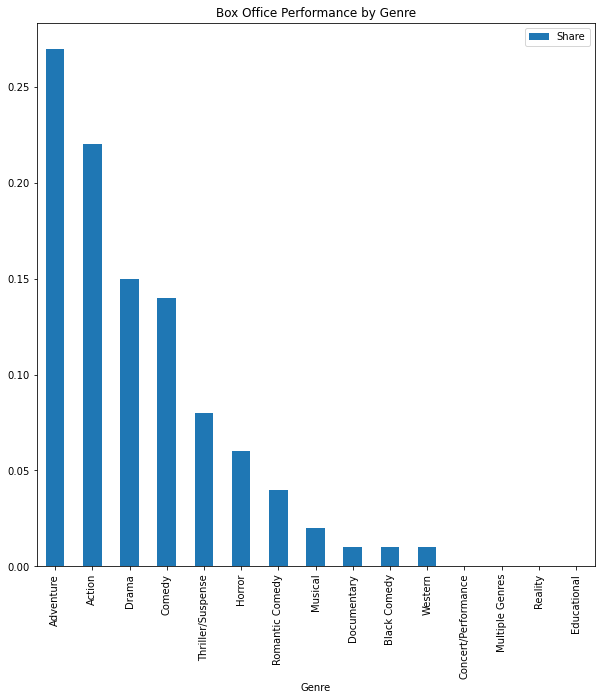

In [182]:
import matplotlib.pyplot as plt
import numpy as np

genre_data.plot.bar(x='Genre', y='Share')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_ylabel('Genre')
plt.title('Box Office Performance by Genre');

In [191]:
genre_breakdown['genre_name']

0              Comedy
1            Thriller
2              Action
3             Romance
4           Adventure
5               Crime
6              Family
7             Fantasy
8           Animation
9              Horror
10    Science Fiction
11            Mystery
12            History
13                War
14              Music
15            Western
16           TV Movie
Name: genre_name, dtype: object

In [189]:
genre_data['Genre']

0               Adventure
1                  Action
2                   Drama
3                  Comedy
4       Thriller/Suspense
5                  Horror
6         Romantic Comedy
7                 Musical
8             Documentary
9            Black Comedy
10                Western
11    Concert/Performance
12        Multiple Genres
13                Reality
14            Educational
Name: Genre, dtype: object

In [ ]:
# making a list of movie ids from main movie list
lists_ids = top_movies.id.values.tolist()

#request
response = requests.get('https://api.themoviedb.org/3/movie/238?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US')
    
# response
data = response.json()

list_movies = []

movies = {
    'Title': data['title'], 
    'Release Date': data[release_date],  
    'Runtime': data[runtime],  
    'Genres': data['genres']['name'],
    'Budget': data['budget'], 
    'Revenue': data['revenue'],
    'Popularity': data['popularity'], 
    'Vote Average': data['vote_average'],
    'Vote Count': data['vote_count']

}
# append data to list
list_movies.append(movies)
                         
all_movies = pd.DataFrame(rows, columns=['Title', 'Release Date', 'Runtime', 'Genres',
                                'Budget', 'Revenue', 'Popularity', 'Vote Average','Vote Count'])                   


response.json().keys()

In [ ]:
print(response.json().values())

In [ ]:
movie_budgets = []

for movie_id in lists_ids:
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}/?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US')
        
        data = response.json()['results']

        # append data
        movie_budgets.append(data)